# <span style = "color:#FFFFFF; background-color: #FF99AA"> CIFAR10 딥러닝 모델</span>

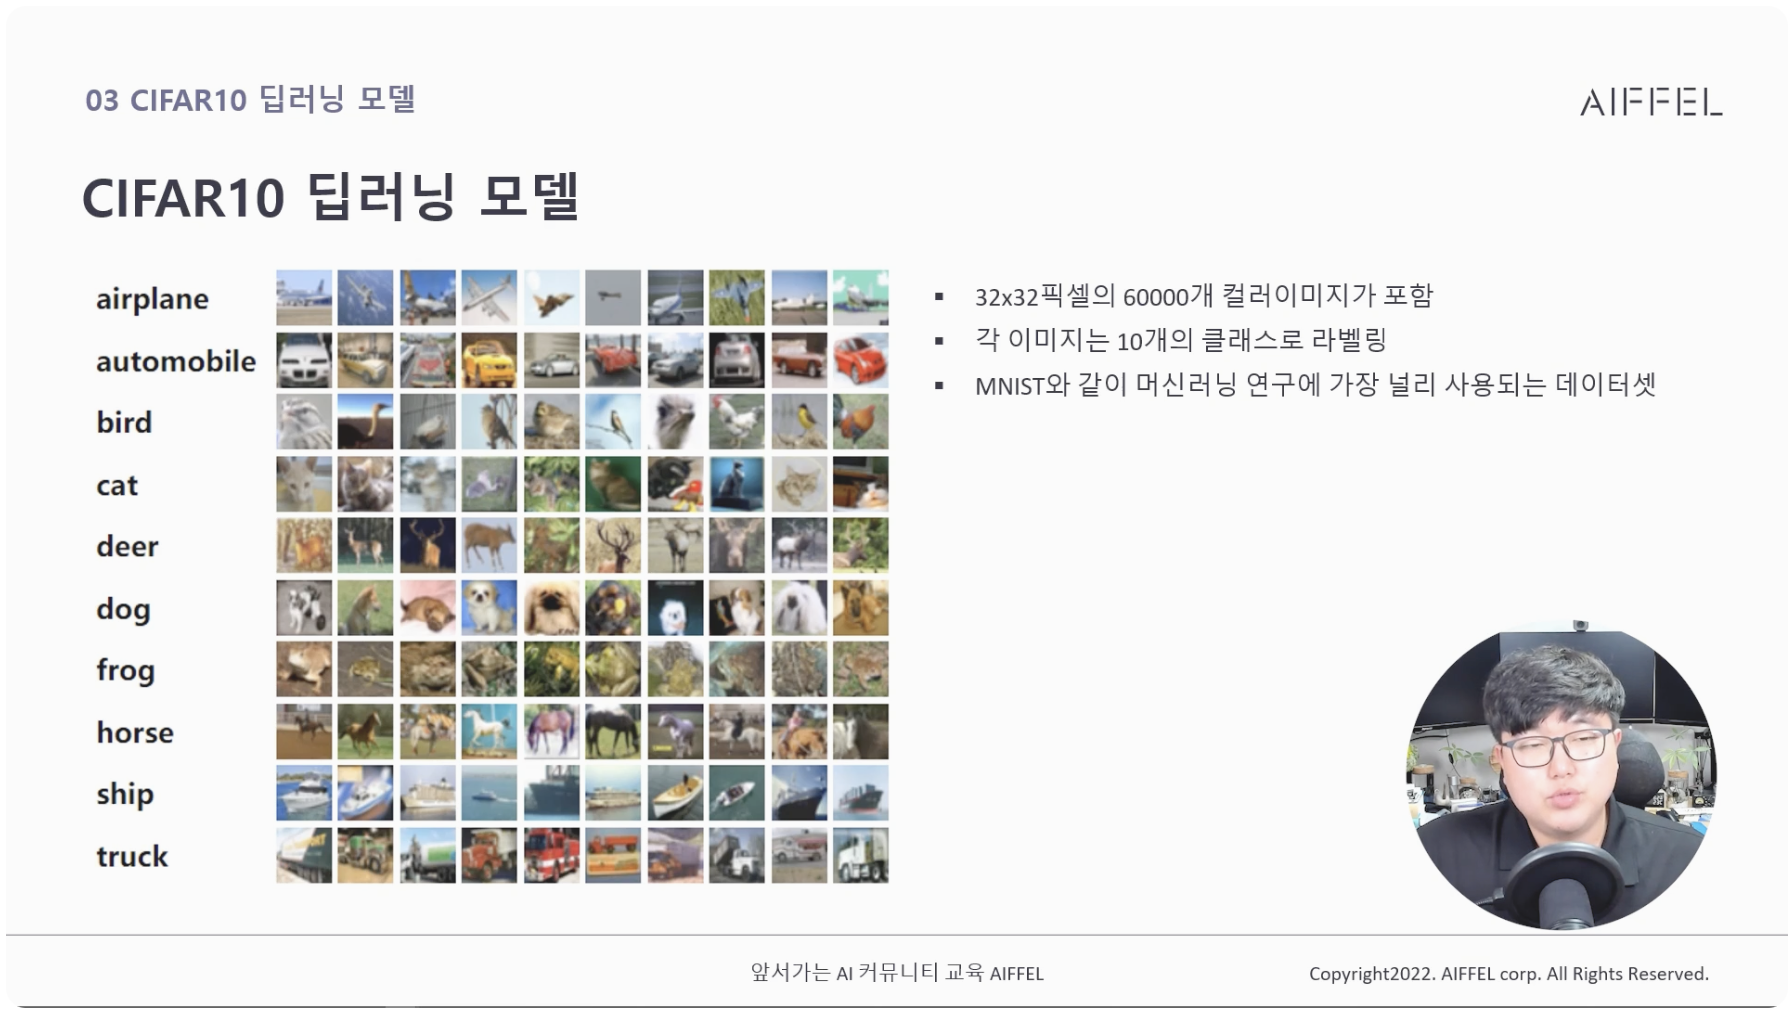

### <span style = "background-color: #FFDDE5"> 데이터 로드 및 전처리</span>
---
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 데이터셋은 **`keras.datasets`** 에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 **`train_test_split`** 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2)


# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [3]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

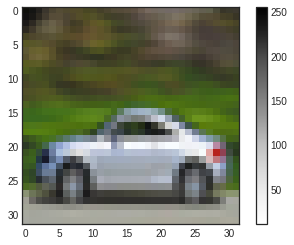

In [4]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [5]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [6]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [7]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### <span style = "background-color: #FFDDE5"> 모델 구성 및 컴파일</span>
---
- BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
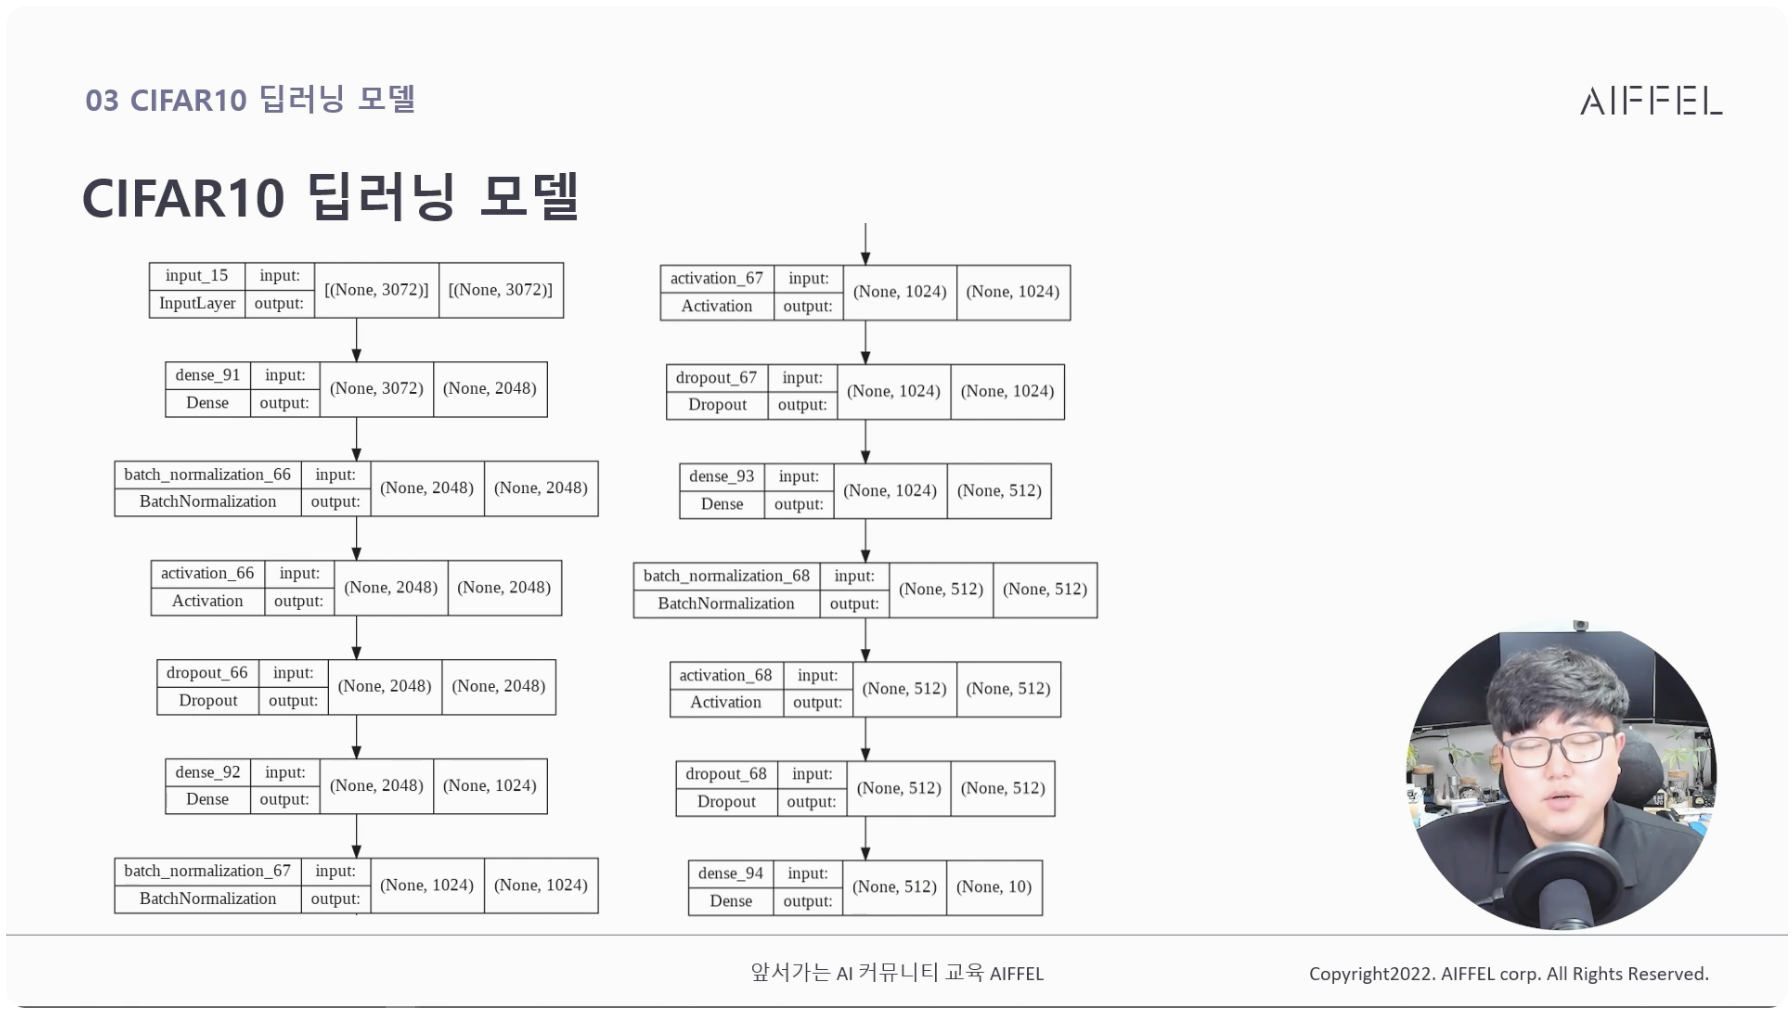

In [8]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
model = models.Sequential()

### 비교대조의 편의를 위하여 제시 모델 구조도와 동일한 레이어명 사용
model.add(layers.Input(shape=(3072, ), name='input_15'))

model.add(layers.Dense(2048, name='dense_91'))
model.add(layers.BatchNormalization(name='batch_normalization_66'))
model.add(layers.Activation('relu', name='activation_66')) 
model.add(layers.Dropout(0.5, name='dropout_66'))

model.add(layers.Dense(1024, name='dense_92'))
model.add(layers.BatchNormalization(name='batch_normalization_67'))
model.add(layers.Activation('relu', name='activation_67')) 
model.add(layers.Dropout(0.5, name='dropout_67'))

model.add(layers.Dense(512, name='dense_93'))
model.add(layers.BatchNormalization(name='batch_normalization_68'))
model.add(layers.Activation('relu', name='activation_68')) 
model.add(layers.Dropout(0.5, name='dropout_68'))

model.add(layers.Dense(10, activation='softmax', name='dense_94'))



model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_66 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_66 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_92 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_67 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_67 (Activation)   (None, 1024)              0

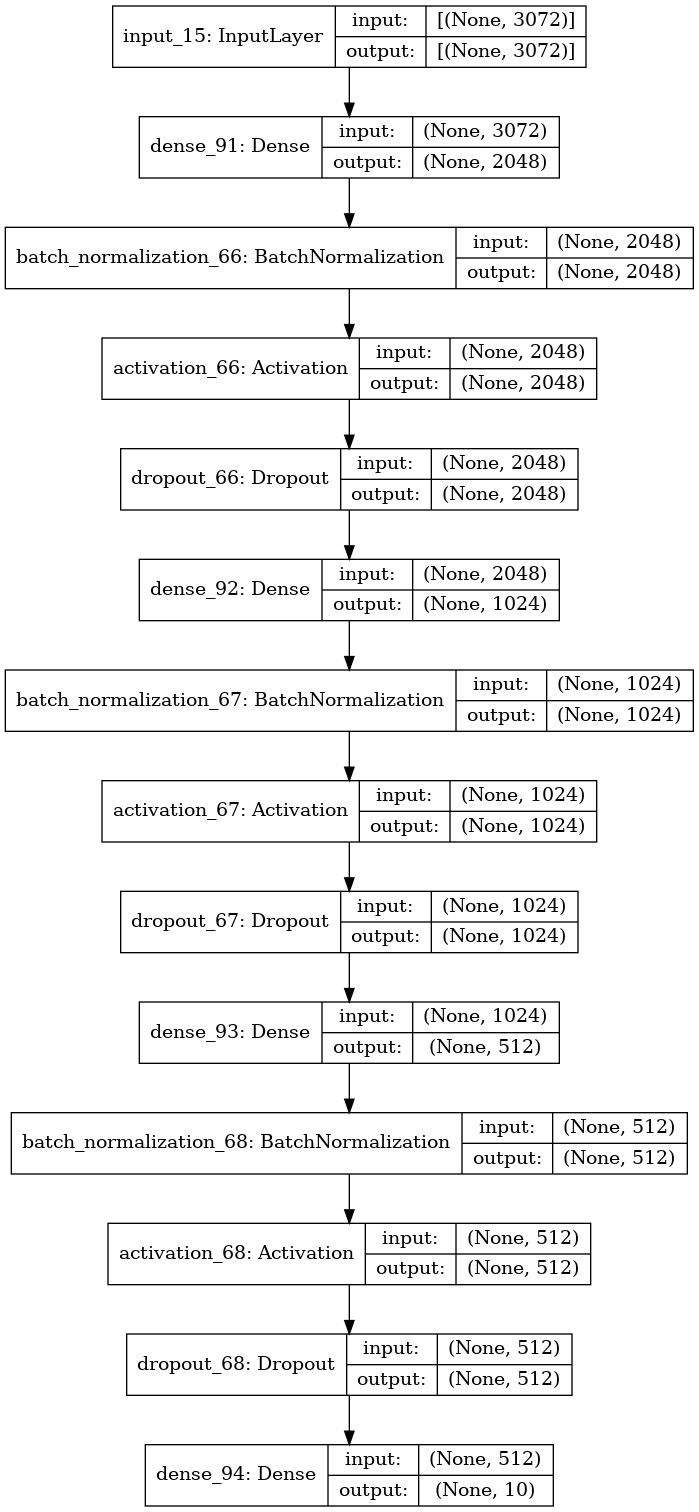

In [11]:
from tensorflow.keras import utils
utils.plot_model(model, show_shapes=True)

### <span style = "background-color: #FFDDE5"> 모델 학습</span>
---
- ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [12]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
from tensorflow.keras import callbacks
check_point_cb = callbacks.ModelCheckpoint('keras_cifar10_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=1000, ### 제시된 시각화 그래프는 약 800 epochs 학습을 수행하였으므로 동일하게 진행
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/1000
79/79 [==============================] - 3s 18ms/step - loss: 2.6709 - accuracy: 0.1593 - val_loss: 2.1696 - val_accuracy: 0.1695
Epoch 2/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.3755 - accuracy: 0.2209 - val_loss: 2.0185 - val_accuracy: 0.2640
Epoch 3/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.2489 - accuracy: 0.2521 - val_loss: 1.9014 - val_accuracy: 0.3145
Epoch 4/1000
79/79 [==============================] - 1s 17ms/step - loss: 2.1627 - accuracy: 0.2729 - val_loss: 1.8254 - val_accuracy: 0.3473
Epoch 5/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.0956 - accuracy: 0.2833 - val_loss: 1.7737 - val_accuracy: 0.3664
Epoch 6/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.0382 - accuracy: 0.2964 - val_loss: 1.7274 - val_accuracy: 0.3799
Epoch 7/1000
79/79 [==============================] - 1s 11ms/step - loss: 2.0071 - accuracy: 0.3066 - val_loss: 1.7108 - val_accuracy: 0.3886

Epoch 58/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.5059 - accuracy: 0.4613 - val_loss: 1.4699 - val_accuracy: 0.4705
Epoch 59/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.5018 - accuracy: 0.4629 - val_loss: 1.4672 - val_accuracy: 0.4713
Epoch 60/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.4954 - accuracy: 0.4639 - val_loss: 1.4613 - val_accuracy: 0.4728
Epoch 61/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.4948 - accuracy: 0.4631 - val_loss: 1.4633 - val_accuracy: 0.4700
Epoch 62/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.4908 - accuracy: 0.4669 - val_loss: 1.4431 - val_accuracy: 0.4796
Epoch 63/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.4884 - accuracy: 0.4648 - val_loss: 1.4481 - val_accuracy: 0.4766
Epoch 64/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.4819 - accuracy: 0.4683 - val_loss: 1.4503 - val_accuracy:

Epoch 115/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3479 - accuracy: 0.5164 - val_loss: 1.3798 - val_accuracy: 0.5086
Epoch 116/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3455 - accuracy: 0.5162 - val_loss: 1.3438 - val_accuracy: 0.5126
Epoch 117/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3411 - accuracy: 0.5181 - val_loss: 1.3586 - val_accuracy: 0.5118
Epoch 118/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3394 - accuracy: 0.5172 - val_loss: 1.3895 - val_accuracy: 0.5044
Epoch 119/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3361 - accuracy: 0.5189 - val_loss: 1.3506 - val_accuracy: 0.5132
Epoch 120/1000
79/79 [==============================] - 1s 10ms/step - loss: 1.3340 - accuracy: 0.5208 - val_loss: 1.3499 - val_accuracy: 0.5178
Epoch 121/1000
79/79 [==============================] - 1s 11ms/step - loss: 1.3281 - accuracy: 0.5240 - val_loss: 1.3571 - val_ac

- 학습 히스토리의 **`loss`**, **`val_loss`**, **`accuracy`**, **`val_accuracy`** 를 차트로 시각화합니다.
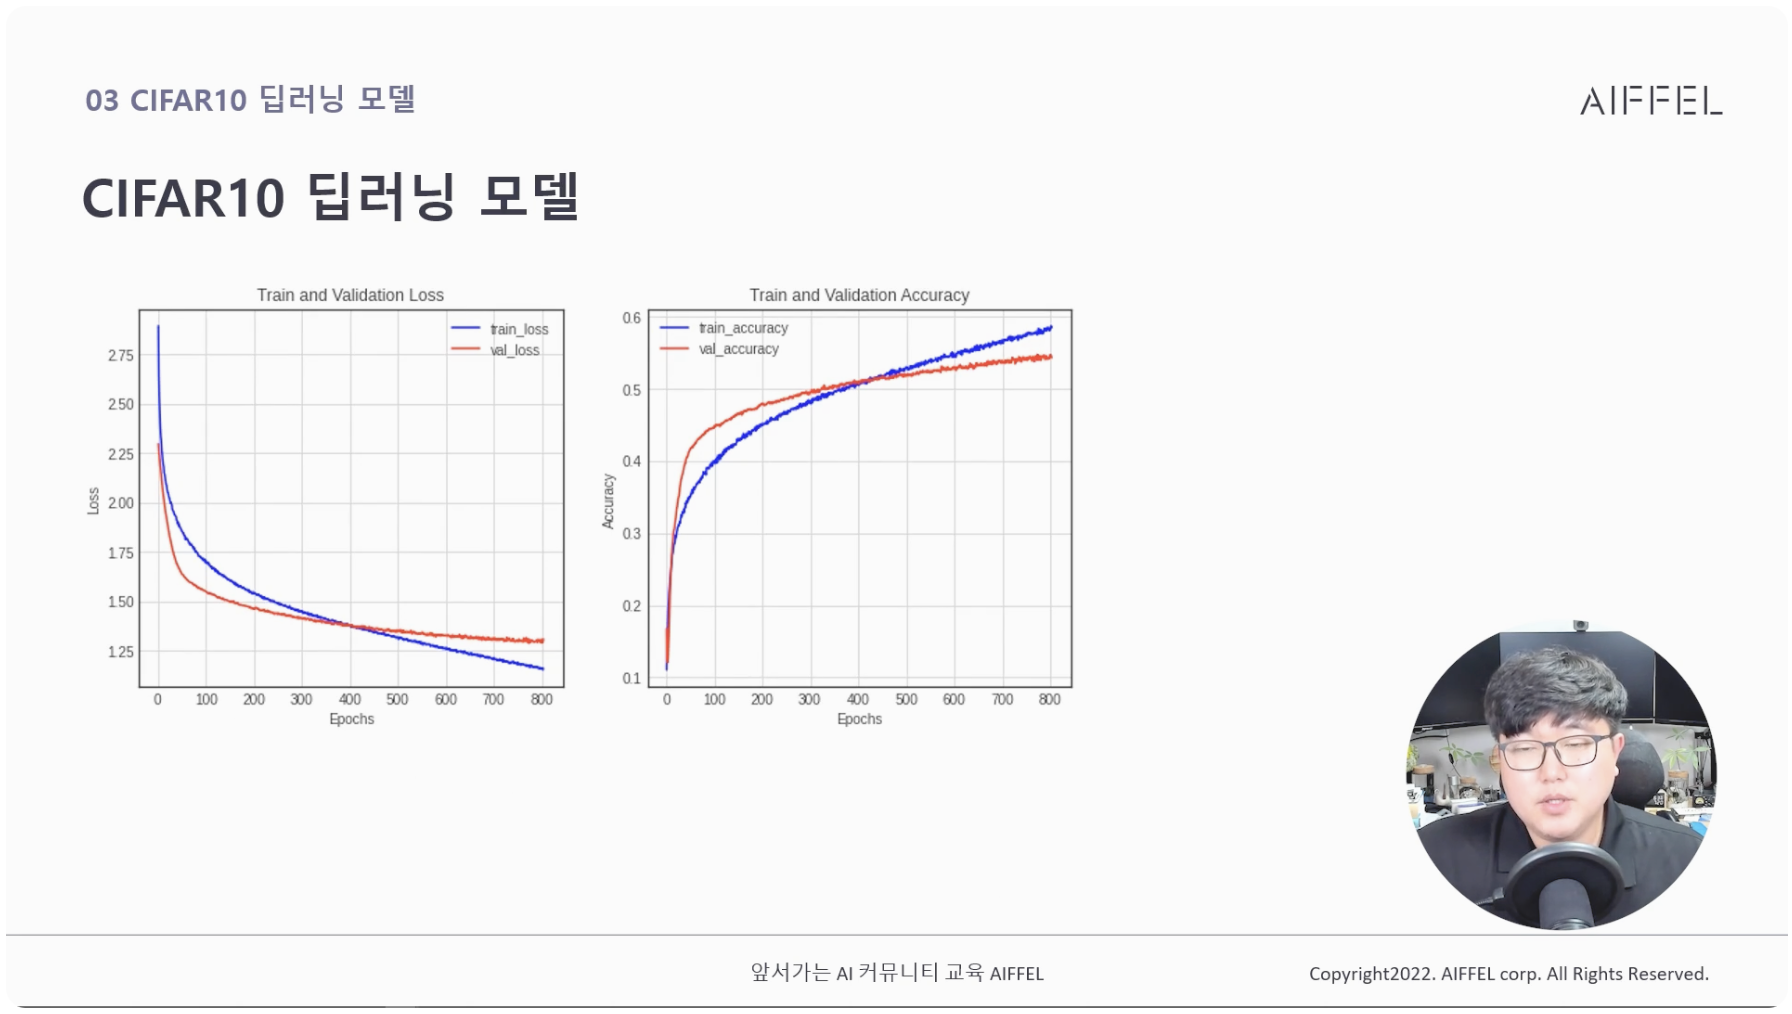

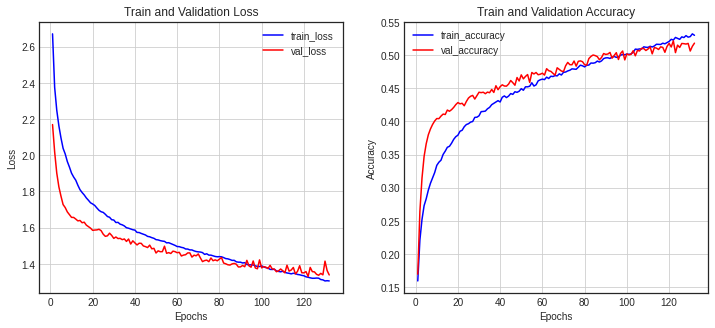

In [13]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

### train_loss, val_loss 비교를 위한 그래프 작성
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

### train_accuracy, val_accuracy 비교를 위한 그래프 작성
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### <span style = "background-color: #FFDDE5"> 모델 평가 및 예측</span>
---
- 테스트 데이터셋을 이용해 모델을 평가합니다.

In [14]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3245 - accuracy: 0.5226


[1.32450270652771, 0.522599995136261]

---
**회고록**  
batch normalization, dropout이 적용된 3개의 Dense 레이어와 softmax 함수가 적용된 1개의 Dense 레이어로 구성된 모델을 이용한 학습 결과, 제시된 시각화 그래프와 유사한 양상을 보였다.  
epochs를 거듭할수록 loss는 줄어들고 accuracy는 늘어나는 양상을 보였으나, epochs 약 130 이상부터는 그 변동폭이 미미하여 early stopping을 통해 training을 사전에 종료하였다.  

이전까지의 프로젝트는 제시된 학습 모델 코드를 그대로 활용하는 방식으로 TensorFlow 프로그래밍에 관한 이해도를 높이기 어려웠는데,  
이번 프로젝트에서는 간단한 구조의 모델나마 직접 코드를 작성하고 구현해볼 수 있어서 굉장히 뿌듯했다 🥹